In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

In [5]:
datasets = {
    "0.125": createData(0.125),
    "0.25": createData(0.25),
    "0.5": createData(0.5),
    "1.0": createData(1.0),
    "2.0": createData(2.0)
}


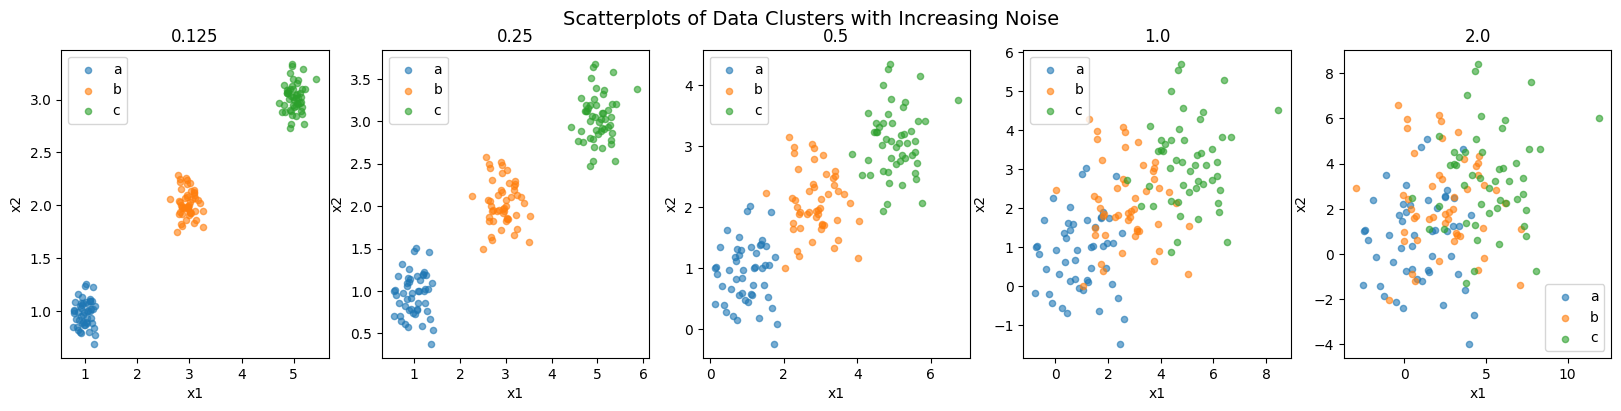

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, (name, df) in zip(axes, datasets.items()):
    for group, color in zip(['a', 'b', 'c'], ['r', 'g', 'b']):
        subset = df[df['group'] == group]
        ax.scatter(subset['x1'], subset['x2'], label=group, alpha=0.6, s=20)
    ax.set_title(name)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()
plt.suptitle("Scatterplots of Data Clusters with Increasing Noise", fontsize=14)
plt.show()

The distinctiveness of the clusters has become less and less apparent- the groups have (as of 2.0) merged such that the group's could not be cleanly sectioned anymore. 

In [7]:
def scree_plot(data, ax, title):
    X = data[['x1', 'x2']].values
    X = StandardScaler().fit_transform(X)  # Standardize the data
    distortions = []
    k_values = range(1, 10)  # Testing k from 1 to 9
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    ax.plot(k_values, distortions, marker='o', linestyle='-')
    ax.set_title(title)
    ax.set_xlabel("Number of clusters (k)")
    ax.set_ylabel("Distortion (Inertia)")

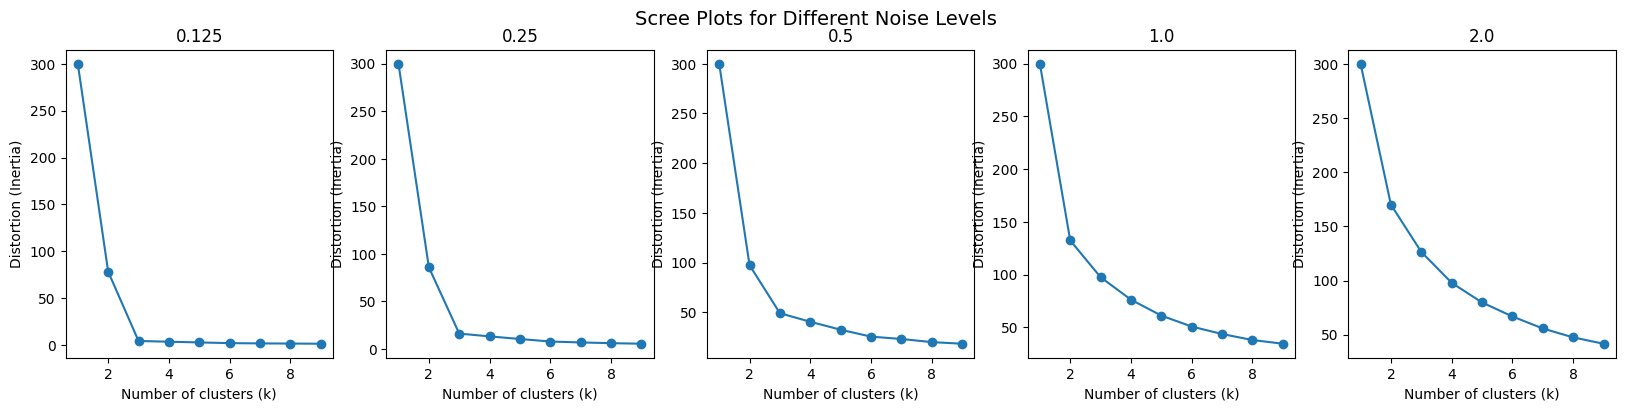

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, (name, df) in zip(axes, datasets.items()):
    scree_plot(df, ax, name)
plt.suptitle("Scree Plots for Different Noise Levels", fontsize=14)
plt.show()

When noise is low, the scree plot provides a clear choice for k due to the sharp drop in explained variance after the first component (the elbow). As noise increases, the variance is more evenly spread, making it difficult to justify a specific k using the "elbow", showing the difficulty of selecting k in high-noise scenarios.

The elbow method works well when clear structure exists, as seen in low-noise scenarios. As noise increases, we struggle to extract meaningful components, making it harder to define an optimal k. The scree plot visually confirms when clustering is well-defined (sharp elbow) versus when the data is too noisy (no clear elbow).
